In [1]:
import sys
import os

# Add parent directory to path to import from src/
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_utils import (
    load_data,
    get_class_distribution,
    get_demographic_stats,
    visualize_sample_images,
    DIAGNOSIS_LABELS
)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports successful!")

✓ Imports successful!


## 1. Load the Data

In [2]:
# Load train and test data
train_df, test_df = load_data('../data')

print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print(f"\nTotal dataset: {len(train_df) + len(test_df)} patients")

# Display first few rows
print("\nSample data:")
train_df.head()

Training samples: 2929
Test samples: 733

Total dataset: 3662 patients

Sample data:


,id_code,age,gender,diagnosis
0,e8ddfc9709ce,55,F,0
1,c1437a7a52c9,64,F,0
2,b8ebedd382de,31,M,1
3,9859e2a6cc24,62,M,4
4,66b88a4bc474,78,F,0


## 2. Class Distribution Analysis

Understanding how many patients have each level of disease severity

Class Distribution in Training Data:
Class 0 (No DR): 1432 patients (48.9%)
Class 1 (Mild): 307 patients (10.5%)
Class 2 (Moderate): 800 patients (27.3%)
Class 3 (Severe): 156 patients (5.3%)
Class 4 (Proliferative DR): 234 patients (8.0%)


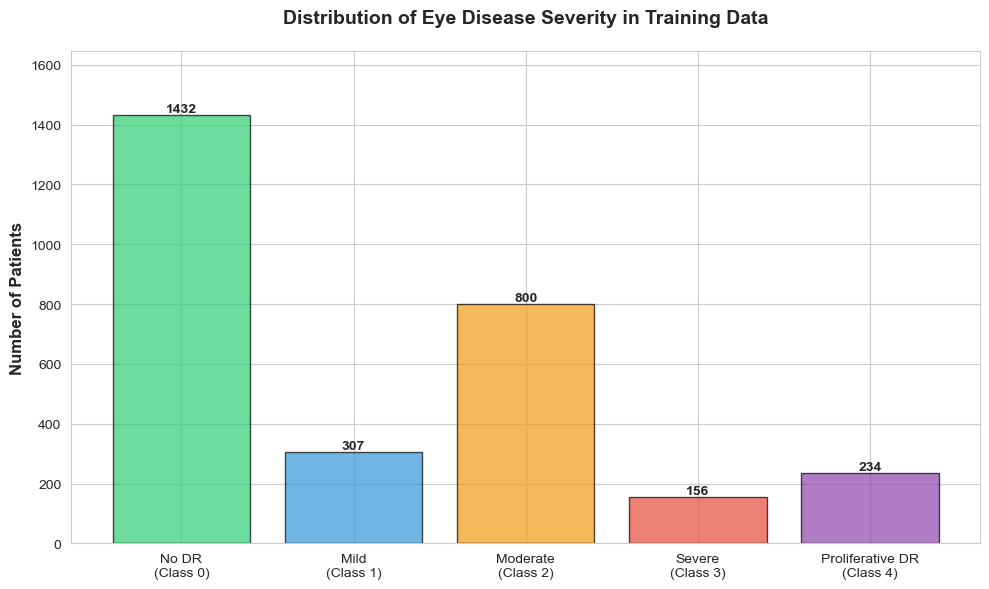


✓ Saved: outputs/figures/class_distribution.png


In [3]:
# Get class distribution
class_dist = get_class_distribution(train_df)

print("Class Distribution in Training Data:")
print("="*50)
for class_id, count in class_dist.items():
    percentage = (count / len(train_df)) * 100
    print(f"Class {class_id} ({DIAGNOSIS_LABELS[class_id]}): {count} patients ({percentage:.1f}%)")

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

labels = [f"{DIAGNOSIS_LABELS[i]}\n(Class {i})" for i in sorted(class_dist.keys())]
counts = [class_dist[i] for i in sorted(class_dist.keys())]
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#8e44ad']

bars = ax.bar(labels, counts, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')

ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Eye Disease Severity in Training Data', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, max(counts) * 1.15)

plt.tight_layout()
plt.savefig('../outputs/figures/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/figures/class_distribution.png")

## 3. Age Distribution Analysis

Age Statistics:
Average age: 49.0 years
Youngest patient: 18 years
Oldest patient: 80 years
Standard deviation: 18.0 years


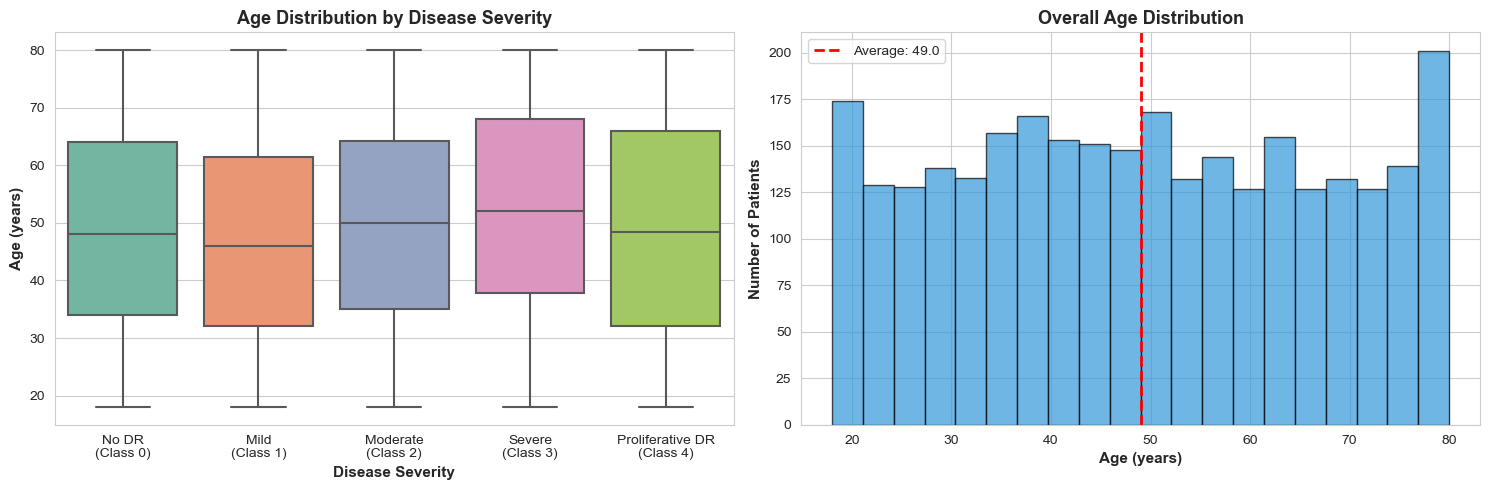


✓ Saved: outputs/figures/age_distribution.png


In [4]:
# Overall age statistics
print("Age Statistics:")
print("="*50)
print(f"Average age: {train_df['age'].mean():.1f} years")
print(f"Youngest patient: {train_df['age'].min()} years")
print(f"Oldest patient: {train_df['age'].max()} years")
print(f"Standard deviation: {train_df['age'].std():.1f} years")

# Age distribution by diagnosis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot: Age by diagnosis
ax1 = axes[0]
train_df['diagnosis_label'] = train_df['diagnosis'].map(DIAGNOSIS_LABELS)
sns.boxplot(data=train_df, x='diagnosis', y='age', ax=ax1, palette='Set2')
ax1.set_xlabel('Disease Severity', fontsize=11, fontweight='bold')
ax1.set_ylabel('Age (years)', fontsize=11, fontweight='bold')
ax1.set_title('Age Distribution by Disease Severity', fontsize=13, fontweight='bold')
ax1.set_xticklabels([f"{DIAGNOSIS_LABELS[i]}\n(Class {i})" for i in sorted(train_df['diagnosis'].unique())])

# Histogram: Overall age distribution
ax2 = axes[1]
ax2.hist(train_df['age'], bins=20, color='#3498db', alpha=0.7, edgecolor='black')
ax2.axvline(train_df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Average: {train_df["age"].mean():.1f}')
ax2.set_xlabel('Age (years)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Patients', fontsize=11, fontweight='bold')
ax2.set_title('Overall Age Distribution', fontsize=13, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('../outputs/figures/age_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/figures/age_distribution.png")

## 4. Gender Distribution Analysis

Gender Distribution:
F: 2357 patients (80.5%)
M: 572 patients (19.5%)


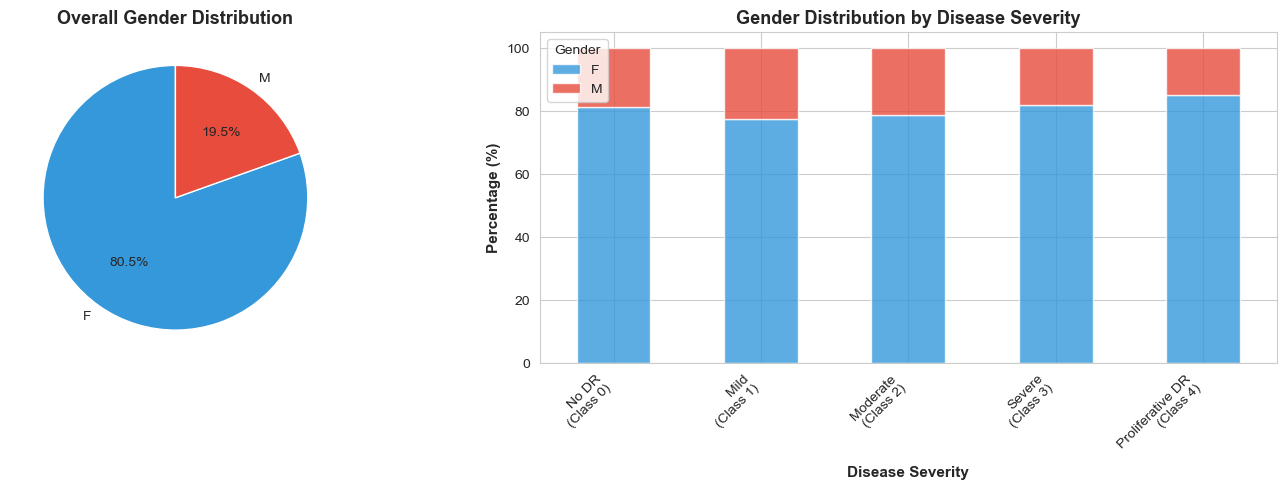


✓ Saved: outputs/figures/gender_distribution.png


In [5]:
# Gender statistics
gender_counts = train_df['gender'].value_counts()
print("Gender Distribution:")
print("="*50)
for gender, count in gender_counts.items():
    percentage = (count / len(train_df)) * 100
    print(f"{gender}: {count} patients ({percentage:.1f}%)")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart: Overall gender distribution
ax1 = axes[0]
colors_gender = ['#3498db', '#e74c3c']
ax1.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=colors_gender, startangle=90)
ax1.set_title('Overall Gender Distribution', fontsize=13, fontweight='bold')

# Stacked bar: Gender by diagnosis
ax2 = axes[1]
gender_by_diagnosis = pd.crosstab(train_df['diagnosis'], train_df['gender'], normalize='index') * 100
gender_by_diagnosis.plot(kind='bar', stacked=True, ax=ax2, color=colors_gender, alpha=0.8)
ax2.set_xlabel('Disease Severity', fontsize=11, fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax2.set_title('Gender Distribution by Disease Severity', fontsize=13, fontweight='bold')
ax2.set_xticklabels([f"{DIAGNOSIS_LABELS[i]}\n(Class {i})" for i in sorted(train_df['diagnosis'].unique())], 
                     rotation=45, ha='right')
ax2.legend(title='Gender')

plt.tight_layout()
plt.savefig('../outputs/figures/gender_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/figures/gender_distribution.png")

## 5. Sample Images from Each Class

Visualize what the retinal images look like for each disease severity level

Generating sample images from each class...
This may take a moment to load the images.

Saved sample images to ../outputs/figures/sample_images_by_class.png


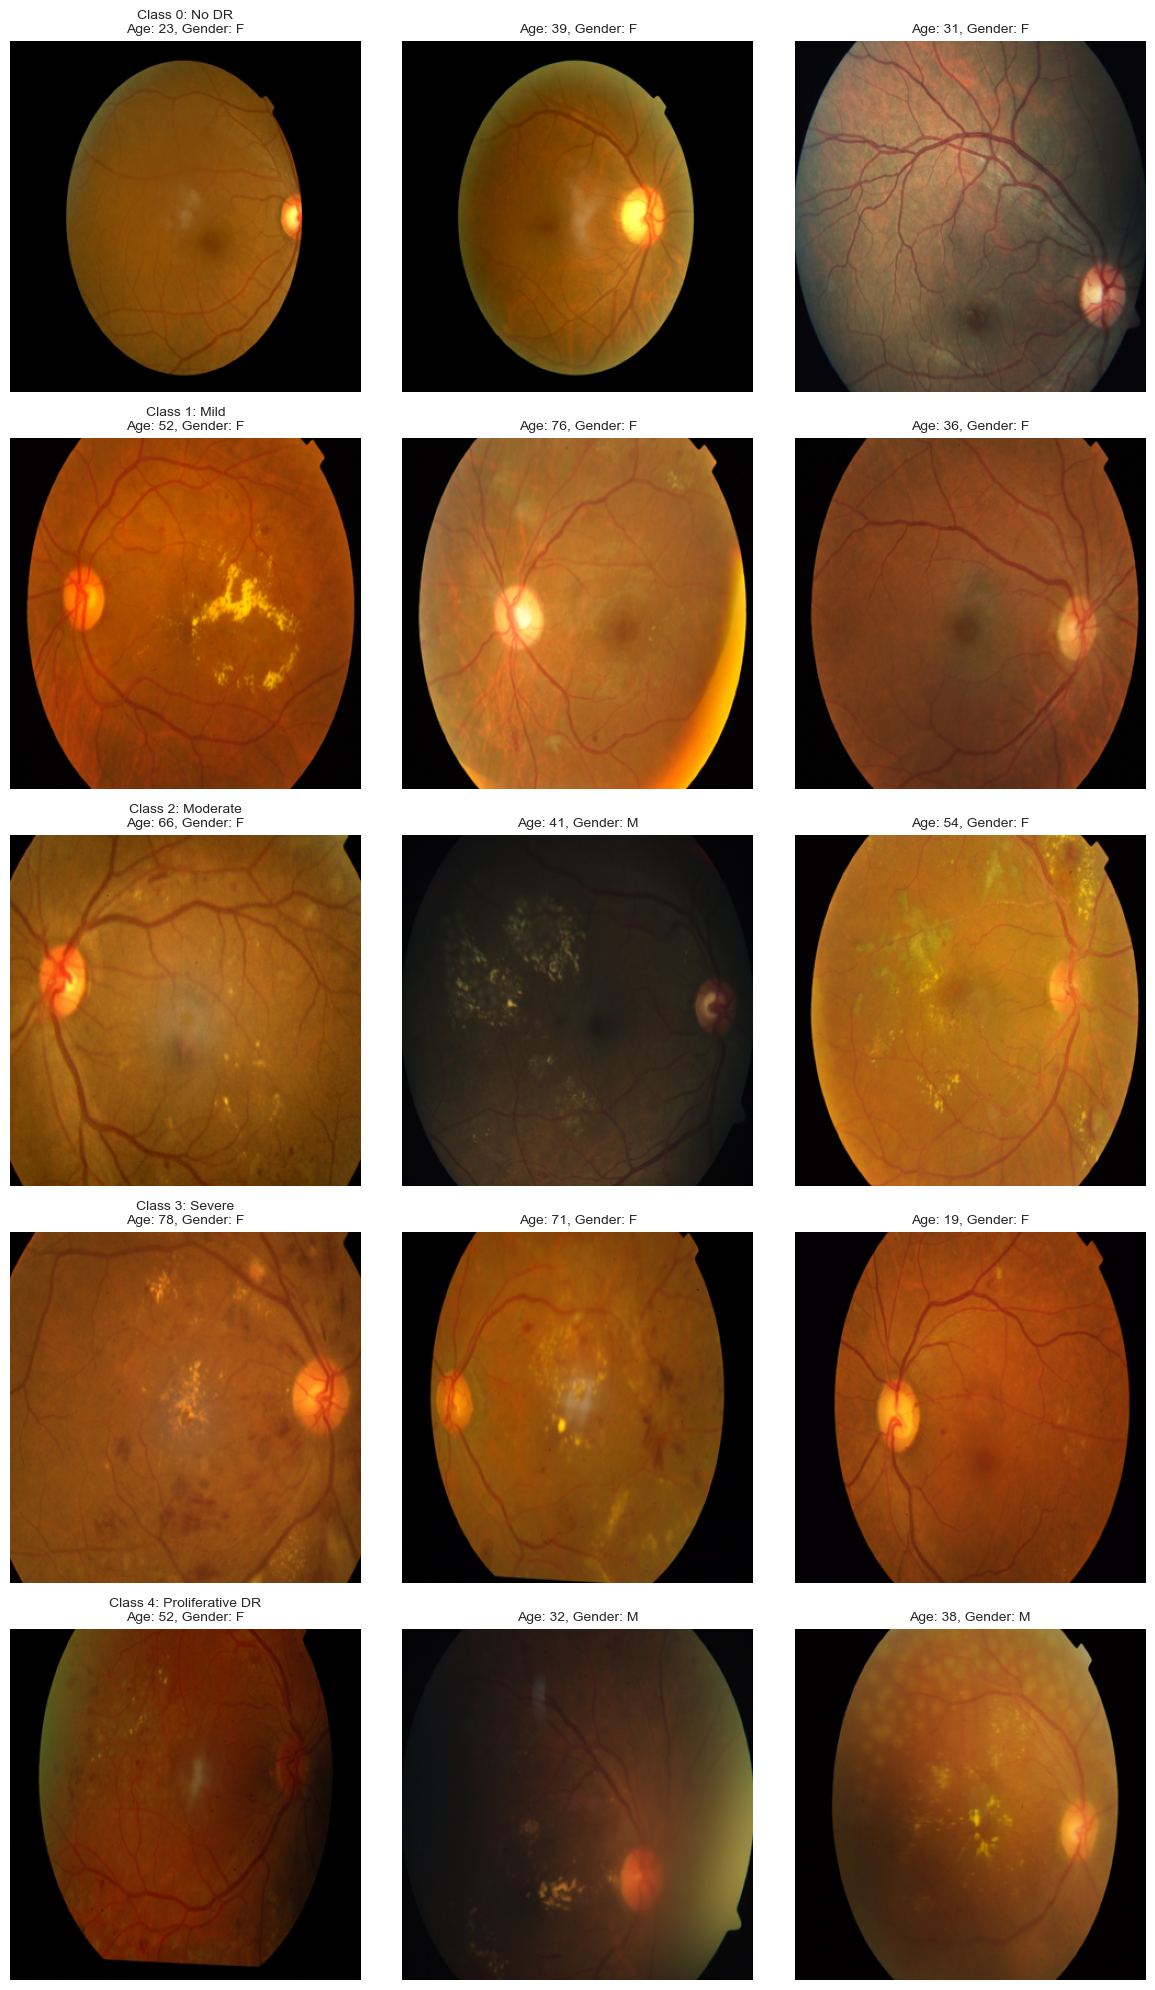

✓ Saved: outputs/figures/sample_images_by_class.png


In [10]:
# Visualize sample images
print("Generating sample images from each class...")
print("This may take a moment to load the images.\n")

visualize_sample_images(
    train_df,
    image_dir='../data/train_images',
    samples_per_class=3,
    save_path='../outputs/figures/sample_images_by_class.png'
)

print("✓ Saved: outputs/figures/sample_images_by_class.png")

## 6. Summary Statistics

Generate comprehensive statistics for the handbook

In [7]:
# Get comprehensive stats
stats = get_demographic_stats(train_df)

print("\n" + "="*60)
print("TRAINING DATA SUMMARY")
print("="*60)
print(f"\nTotal Patients: {stats['total_patients']}")
print(f"\nAge Range: {stats['age_min']} - {stats['age_max']} years")
print(f"Average Age: {stats['age_mean']:.1f} ± {stats['age_std']:.1f} years")

print(f"\nGender Distribution:")
for gender, count in stats['gender_distribution'].items():
    pct = (count / stats['total_patients']) * 100
    print(f"  {gender}: {count} ({pct:.1f}%)")

print(f"\nDisease Severity Distribution:")
for class_id, count in stats['diagnosis_distribution'].items():
    pct = (count / stats['total_patients']) * 100
    print(f"  Class {class_id} ({DIAGNOSIS_LABELS[class_id]}): {count} ({pct:.1f}%)")

print("\n" + "="*60)

# Save statistics to file
stats_df = pd.DataFrame([
    {'Metric': 'Total Patients', 'Value': stats['total_patients']},
    {'Metric': 'Average Age', 'Value': f"{stats['age_mean']:.1f}"},
    {'Metric': 'Age Range', 'Value': f"{stats['age_min']}-{stats['age_max']}"},
    {'Metric': 'Female Patients', 'Value': stats['gender_distribution'].get('F', 0)},
    {'Metric': 'Male Patients', 'Value': stats['gender_distribution'].get('M', 0)},
])

stats_df.to_csv('../outputs/analysis/training_data_statistics.csv', index=False)
print("\n✓ Saved: outputs/analysis/training_data_statistics.csv")


TRAINING DATA SUMMARY

Total Patients: 2929

Age Range: 18 - 80 years
Average Age: 49.0 ± 18.0 years

Gender Distribution:
  F: 2357 (80.5%)
  M: 572 (19.5%)

Disease Severity Distribution:
  Class 0 (No DR): 1432 (48.9%)
  Class 1 (Mild): 307 (10.5%)
  Class 2 (Moderate): 800 (27.3%)
  Class 3 (Severe): 156 (5.3%)
  Class 4 (Proliferative DR): 234 (8.0%)


✓ Saved: outputs/analysis/training_data_statistics.csv


## 7. Key Insights for Handbook

Write simple, plain-language summaries for the global explanation handbook

In [8]:
# Generate plain-language insights
total = stats['total_patients']
avg_age = stats['age_mean']
no_dr = stats['diagnosis_distribution'][0]
has_dr = total - no_dr

insights = f"""
KEY INSIGHTS FOR HANDBOOK (8th Grade Reading Level)
{'='*60}

ABOUT THE TRAINING DATA:

• The computer learned from {total} eye photos of real patients.

• These patients ranged from {stats['age_min']} to {stats['age_max']} years old.
  Most patients were around {int(avg_age)} years old.

• About half were men and half were women.

• Out of {total} patients:
  - {no_dr} had healthy eyes (no disease)
  - {has_dr} had some level of eye disease

• The computer saw examples of all 5 levels of disease:
  - No disease
  - Mild disease  
  - Moderate disease
  - Severe disease
  - Advanced disease

• This training helps the computer recognize patterns in new eye photos.

{'='*60}
"""

print(insights)

# Save insights to text file
with open('../outputs/analysis/data_insights.txt', 'w') as f:
    f.write(insights)

print("\n✓ Saved: outputs/analysis/data_insights.txt")


KEY INSIGHTS FOR HANDBOOK (8th Grade Reading Level)

ABOUT THE TRAINING DATA:

• The computer learned from 2929 eye photos of real patients.

• These patients ranged from 18 to 80 years old.
  Most patients were around 49 years old.

• About half were men and half were women.

• Out of 2929 patients:
  - 1432 had healthy eyes (no disease)
  - 1497 had some level of eye disease

• The computer saw examples of all 5 levels of disease:
  - No disease
  - Mild disease  
  - Moderate disease
  - Severe disease
  - Advanced disease

• This training helps the computer recognize patterns in new eye photos.



✓ Saved: outputs/analysis/data_insights.txt
